#### 문자열 인덱싱

In [99]:
import pandas as pd
import numpy as np

In [100]:
alarm = pd.read_csv('./data/강원도_강원도소방본부_소방용수시설.csv', encoding = 'cp949')
df = pd.read_csv('./data/구조 종별 신고.재난 데이터.csv', encoding= 'utf-8')

In [101]:
# 데이터 화재관련 값만 추출

df = df[(df['ACDNT_CAUSE'] == '기타화재') | (df['ACDNT_CAUSE'] == '화약류') | (df['ACDNT_CAUSE'] == '방화')
        | (df['ACDNT_CAUSE'] == '폭발물') | (df['ACDNT_CAUSE'] == '화재확인')]

In [102]:
df.isnull().sum()
df = df.dropna(axis = 1) # 누락값이 있는 열 삭제

## 소방용수시설의 EMD_NM 만들기

- 재난데이터와 합치기 위해 EMD_NM를 만들어야함

In [103]:
# 소재지지번주소의 7번째 이후의 데이터를 만들어서 저장
alarm['EMD_NM'] = alarm['소재지지번주소'].str[7:]
alarm.head(5)

,시설번호,시설유형코드,시군구명,시군구코드,소재지지번주소,위도,경도,안전센터명,보호틀유무,사용가능여부,설치연도,배관깊이,출수압력,배관지름,관할기관명,데이터기준일자,EMD_NM
0,강촌001호,1,춘천시,42110,강원도 춘천시 남산면 창촌리 145-1,37.786189,127.649237,강촌안전센터,N,Y,2007,0.7,7.0,100,춘천소방서,2021-11-19,남산면 창촌리 145-1
1,강촌002호,1,춘천시,42110,강원도 춘천시 남산면 창촌리 147-1,37.786725,127.647929,강촌안전센터,N,Y,2013,0.7,8.0,100,춘천소방서,2021-11-19,남산면 창촌리 147-1
2,강촌003호,1,춘천시,42110,강원도 춘천시 남산면 창촌리 126-9,37.785523,127.646686,강촌안전센터,Y,Y,2013,0.7,8.0,100,춘천소방서,2021-11-19,남산면 창촌리 126-9
3,강촌004호,1,춘천시,42110,강원도 춘천시 남산면 창촌리 219-15,37.784756,127.643488,강촌안전센터,Y,Y,2013,0.8,8.0,100,춘천소방서,2021-11-19,남산면 창촌리 219-15
4,강촌005호,1,춘천시,42110,강원도 춘천시 남산면 창촌리 238-2,37.781550,127.643992,강촌안전센터,Y,Y,2013,0.7,5.5,100,춘천소방서,2021-11-19,남산면 창촌리 238-2


In [104]:
alarm['EMD_NM'] = alarm['EMD_NM'].str.lstrip() # 앞 공백을 제거

In [105]:
alarm['EMD_NM'].str.split(" ").head() # 공백을 기준으로 분할

0     [남산면, 창촌리, 145-1]
1     [남산면, 창촌리, 147-1]
2     [남산면, 창촌리, 126-9]
3    [남산면, 창촌리, 219-15]
4     [남산면, 창촌리, 238-2]
Name: EMD_NM, dtype: object

In [106]:
dong = alarm['EMD_NM'].str.split(" ", expand=True) # expand = True 데이터 프레임 형태로 저장
dong

,0,1,2,3
0,남산면,창촌리,145-1,None
1,남산면,창촌리,147-1,None
2,남산면,창촌리,126-9,None
3,남산면,창촌리,219-15,None
4,남산면,창촌리,238-2,None
...,...,...,...,...
7249,귀래면,주포리,406-1,None
7250,귀래면,귀래리,244-1,None
7251,귀래면,귀래리,1222,None
7252,귀래면,귀래리,1261,None


In [107]:
# 동의 첫번째 열을 EMD_NM로 지정
alarm['EMD_NM'] = dong[0]
alarm.head()

,시설번호,시설유형코드,시군구명,시군구코드,소재지지번주소,위도,경도,안전센터명,보호틀유무,사용가능여부,설치연도,배관깊이,출수압력,배관지름,관할기관명,데이터기준일자,EMD_NM
0,강촌001호,1,춘천시,42110,강원도 춘천시 남산면 창촌리 145-1,37.786189,127.649237,강촌안전센터,N,Y,2007,0.7,7.0,100,춘천소방서,2021-11-19,남산면
1,강촌002호,1,춘천시,42110,강원도 춘천시 남산면 창촌리 147-1,37.786725,127.647929,강촌안전센터,N,Y,2013,0.7,8.0,100,춘천소방서,2021-11-19,남산면
2,강촌003호,1,춘천시,42110,강원도 춘천시 남산면 창촌리 126-9,37.785523,127.646686,강촌안전센터,Y,Y,2013,0.7,8.0,100,춘천소방서,2021-11-19,남산면
3,강촌004호,1,춘천시,42110,강원도 춘천시 남산면 창촌리 219-15,37.784756,127.643488,강촌안전센터,Y,Y,2013,0.8,8.0,100,춘천소방서,2021-11-19,남산면
4,강촌005호,1,춘천시,42110,강원도 춘천시 남산면 창촌리 238-2,37.781550,127.643992,강촌안전센터,Y,Y,2013,0.7,5.5,100,춘천소방서,2021-11-19,남산면


In [108]:
alarm['EMD_NM'].unique() # 일부 동이 띄어쓰기가 안되있어서 나누어 지지않음

array(['남산면', '남면', '신동면', '서면', '석사동', '동산면', '퇴계동', '동내면', '퇴계도', '운교동',
       '소양로3가', '낙원동', '소양로4가', '중앙로1가', '중앙로2가', '근화동', '죽림동', '조양동',
       '중앙로3가', '약사동', '소양로1가', '중앙로', '옥천동', '교동', '봉의동', '요선동', '소양로2가',
       '효자동', '신북읍', '신동', '사농동', '우두동', '사북면', '북산면', '온의동', '삼천동',
       '칠전동', '송암동', '후평동', '동면', '동면장학리', '횡성읍', '갑천면', '공근면', '서원면',
       '둔내면', '청일면', '우천면', '안흥면', '강림면', '노학동', '금호동', '중앙동', '청학동',
       '청호동', '설악동', '도문동', '대포동', '대포동957', '장사동', '영랑동', '동명동', '홍천읍',
       '화촌면', '두촌면', '북방면', '영귀미면', '서석면', '내면', '내촌면', '영월읍', '북면',
       '주천면', '한반도면', '중동면', '상동읍', '김삿갓면', '평창읍', '미탄면', '대화면', '방림면',
       '봉평면', '용평면', '진부면', '대관령면', '갈말읍', '김화읍', '근남면', '근북면', '철원읍',
       '동송읍', '화천읍', '상서면', '하남면', '화처읍', '간동면', '사내면', '양구읍', '국토정중앙면',
       '방산면', '해안면', '인제읍', '기린면', '서화면', '상남면', '간성읍', '죽왕면', '토성면',
       '죽왕면인정리', '거진읍', '현내면', '양양읍', '손양면', '강현면', '현남면', '현북면', '안현동',
       '저동', '강문동', '초당동', '운정동', '난곡동', '죽헌동933-17', '죽헌동', '지변동', 

In [109]:
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace(pat=r'[^\w]', repl=r'', regex=True) # 특수문자 제거

In [110]:
alarm['EMD_NM'].unique() # 숫자를 정규표현식을 이용하려 했지만 중앙로 n가 등 특수한 경우가 존재하여 제거 X  하나하나 지워야겠음

array(['남산면', '남면', '신동면', '서면', '석사동', '동산면', '퇴계동', '동내면', '퇴계도', '운교동',
       '소양로3가', '낙원동', '소양로4가', '중앙로1가', '중앙로2가', '근화동', '죽림동', '조양동',
       '중앙로3가', '약사동', '소양로1가', '중앙로', '옥천동', '교동', '봉의동', '요선동', '소양로2가',
       '효자동', '신북읍', '신동', '사농동', '우두동', '사북면', '북산면', '온의동', '삼천동',
       '칠전동', '송암동', '후평동', '동면', '동면장학리', '횡성읍', '갑천면', '공근면', '서원면',
       '둔내면', '청일면', '우천면', '안흥면', '강림면', '노학동', '금호동', '중앙동', '청학동',
       '청호동', '설악동', '도문동', '대포동', '대포동957', '장사동', '영랑동', '동명동', '홍천읍',
       '화촌면', '두촌면', '북방면', '영귀미면', '서석면', '내면', '내촌면', '영월읍', '북면',
       '주천면', '한반도면', '중동면', '상동읍', '김삿갓면', '평창읍', '미탄면', '대화면', '방림면',
       '봉평면', '용평면', '진부면', '대관령면', '갈말읍', '김화읍', '근남면', '근북면', '철원읍',
       '동송읍', '화천읍', '상서면', '하남면', '화처읍', '간동면', '사내면', '양구읍', '국토정중앙면',
       '방산면', '해안면', '인제읍', '기린면', '서화면', '상남면', '간성읍', '죽왕면', '토성면',
       '죽왕면인정리', '거진읍', '현내면', '양양읍', '손양면', '강현면', '현남면', '현북면', '안현동',
       '저동', '강문동', '초당동', '운정동', '난곡동', '죽헌동93317', '죽헌동', '지변동', '

In [111]:
# 전처리시 문제가 있던행을 변경
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('죽헌동93317', '죽헌동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('교동18991', '교동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('금학동73', '금학동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('성남동1016', '성남동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('성남동1114', '성남동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('성남동11310', '성남동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('발한동3099', '발한동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('이로동1021', '이로동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('이로동194', '이로동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('구미동4821', '구미동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('단구동1567', '단구동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('단구동15797', '단구동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('단구동15881', '단구동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('태장동1293', '태장동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('대포동957', '대포동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('포남동109721', '포남동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('발한동238', '발한동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('묵호진동2447', '목호진동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('단구동15681', '단구동')
alarm['EMD_NM'] = alarm['EMD_NM'].str.replace('북평동128', '북평동')


In [112]:
# 필요없는 데이터 제거
del alarm['시설유형코드']
del alarm['시설번호']
del alarm['시군구코드']
del alarm['데이터기준일자']

In [113]:
# alarm.to_csv('소방용수시설.csv', encoding='cp949')
# df.to_csv('화재발생위치.csv', encoding='cp949')

---

In [114]:
# 시군구읍으로 해야함 => 중복되는 게 있음


alarm['Full_NM'] = alarm['시군구명'] + ' ' + alarm['EMD_NM']

df['Full_NM'] = df['SIGUNGU_NM'] + ' ' + df['EMD_NM']

In [115]:
df

,MSFRTN_RESC_REPRT_NO,ACDNT_CAUSE,PRCS_RESULT_SE_NM,DCLR_YMD,DCLR_TM,DCLR_YR,SEASON_SE_NM,QTR_SE,DCLR_MNTH,DCLR_DAY,...,SIGUNGU_NM,EMD_NM,EMD_SE_NM,LOC_INFO_X,LOC_INFO_Y,SPT_FRSTT_DIST,ACDNT_PLACE_NM,ACDNT_PLACE_DETAIL_NM,FRSTT_NM,Full_NM
3,20204207506S00069,기타화재,기타,20201011,143700,2020,가을,4,10,11,...,삼척시,원덕읍,읍,37.056720,129.426900,45,"공장, 창고",창고,삼척소방서,삼척시 원덕읍
65,20214205202S00423,기타화재,오인(구조),20210619,115100,2021,여름,2,6,19,...,태백시,금천동,동,37.092359,128.994109,0,노유자시설,기타 노유자시설,태백소방서,태백시 금천동
68,20214205202S00129,기타화재,오인(구조),20210414,183000,2021,봄,2,4,14,...,태백시,금천동,동,37.092483,128.994112,9,"교육,연구시설",특수학교,태백소방서,태백시 금천동
80,20204205103S00075,기타화재,안전조치,20201201,134800,2020,겨울,4,12,1,...,태백시,장성동,동,37.094275,129.025821,7,단독주택,단독주택,태백소방서,태백시 장성동
101,20204205202S00074,기타화재,인명검색,20200212,92900,2020,겨울,1,2,12,...,태백시,장성동,동,37.096466,129.029516,11,"공장, 창고",창고,태백소방서,태백시 장성동
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46826,20204216201S00359,기타화재,오인(구조),20201105,111200,2020,가을,4,11,5,...,고성군,현내면,면,38.539095,128.399752,22,업무시설,기타 업무시설,고성소방서,고성군 현내면
46830,20204216201S00338,기타화재,안전조치,20201020,54100,2020,가을,4,10,20,...,고성군,현내면,면,38.553785,128.403098,21,"도로, 철도",일반도로(기타),고성소방서,고성군 현내면
46833,20204216303S00180,기타화재,안전조치,20201210,153700,2020,겨울,4,12,10,...,고성군,현내면,면,38.576091,128.386314,27,"하천, 바다","기타 하천,바다",고성소방서,고성군 현내면
46834,20204216401S00047,기타화재,기타,20201210,153700,2020,겨울,4,12,10,...,고성군,현내면,면,38.576091,128.386314,17,"하천, 바다","기타 하천,바다",고성소방서,고성군 현내면


---

## 하나의 데이터로 만들기

In [116]:
# 개수를 데이터프레임으로 변환
water = pd.DataFrame(alarm['Full_NM'].value_counts())
fire = pd.DataFrame(df['Full_NM'].value_counts())

In [117]:
# 인덱스를 초기화
water = water.reset_index()
fire = fire.reset_index()

In [118]:
water.rename(columns={'Full_NM':'용수시설개수'}, inplace=True)
fire.rename(columns={'Full_NM':'화재발생횟수'}, inplace=True)

In [119]:
# # 공통된 행 합치기(index 기준으로)
dat = pd.merge(water, fire, on = 'index') 

dat.rename(columns={'index':'Full_NM'}, inplace=True)

dat

,Full_NM,용수시설개수,화재발생횟수
0,홍천군 홍천읍,183,63
1,횡성군 횡성읍,141,62
2,영월군 영월읍,137,54
3,원주시 지정면,127,60
4,태백시 황지동,112,49
...,...,...,...
239,철원군 근북면,1,1
240,삼척시 노곡면,1,11
241,삼척시 하장면,1,9
242,삼척시 성북동,1,2


---

## 필요한 파생변수 생성

- EMD_NM 별 평균화재도착시간 (화재발생도착시간 - 화재발생출동시간)

    출동시	출동분

    DSP_HOUR	DSP_MIN

    현장도착시	현장도착분

    SPT_ARVL_HOUR	SPT_ARVL_MIN


In [120]:
# 위에서 결측값이 있는데 제거했더니 도착시간이 안나와서 새로 load
df = pd.read_csv('./data/구조 종별 신고.재난 데이터.csv', encoding= 'utf-8')

# 데이터 화재관련 값만 추출

df = df[(df['ACDNT_CAUSE'] == '기타화재') | (df['ACDNT_CAUSE'] == '화약류') | (df['ACDNT_CAUSE'] == '방화')
        | (df['ACDNT_CAUSE'] == '폭발물') | (df['ACDNT_CAUSE'] == '화재확인')]

In [121]:
df['Full_NM'] = df['SIGUNGU_NM'] + ' ' + df['EMD_NM']

In [122]:
# 시간*60 + 분으로 해서 하나의 데이터로 만들었음
s_time = (df['DSP_HOUR']*60) + (df['DSP_MIN'])
a_time = (df['SPT_ARVL_HOUR']*60) + (df['SPT_ARVL_MIN'])

In [123]:
# 도착시간에 결측치가 있어서 0분으로 처리
a_time = a_time.fillna(s_time)

In [124]:
# 걸린시간
time = a_time - s_time

time = pd.DataFrame(time)

In [125]:
df['time'] = time

In [126]:
# EMD_NM 별 화재도착시간 만들기
# 평균화재도착시간으로 하려했는데 23시출발 - 0시 도착이면 값이 이상해져서 중앙값으로 하였음.
time = pd.DataFrame(df.groupby(df['Full_NM'])['time'].median())
time = time.reset_index()
time

,Full_NM,time
0,강릉시 강동면,13.0
1,강릉시 강문동,5.0
2,강릉시 견소동,6.0
3,강릉시 교동,5.0
4,강릉시 구정면,8.0
...,...,...
248,횡성군 서원면,10.0
249,횡성군 안흥면,10.0
250,횡성군 우천면,9.0
251,횡성군 청일면,6.5


In [127]:
dat = pd.merge(dat, time, on='Full_NM')
dat

,Full_NM,용수시설개수,화재발생횟수,time
0,홍천군 홍천읍,183,63,5.0
1,횡성군 횡성읍,141,62,5.0
2,영월군 영월읍,137,54,5.0
3,원주시 지정면,127,60,10.0
4,태백시 황지동,112,49,4.0
...,...,...,...,...
239,철원군 근북면,1,1,17.0
240,삼척시 노곡면,1,11,9.0
241,삼척시 하장면,1,9,5.0
242,삼척시 성북동,1,2,6.0


---

#### 풍향, 풍속

In [128]:
# 풍속 (결측치가 너무많아서 일단 전에 행으로 대체)
df['TIME_UNIT_WS'] = df['TIME_UNIT_WS'].fillna(method='ffill')

In [129]:
TIME_UNIT_WS = pd.DataFrame(df.groupby(df['Full_NM'])['TIME_UNIT_WS'].mean())
TIME_UNIT_WS = TIME_UNIT_WS.reset_index()
TIME_UNIT_WS

,Full_NM,TIME_UNIT_WS
0,강릉시 강동면,2.046512
1,강릉시 강문동,1.000000
2,강릉시 견소동,0.700000
3,강릉시 교동,1.770492
4,강릉시 구정면,1.690476
...,...,...
248,횡성군 서원면,2.166667
249,횡성군 안흥면,2.421053
250,횡성군 우천면,1.548387
251,횡성군 청일면,2.250000


In [130]:
# 풍향 결측치를 이전행으로 대체(풍속과 같은이유)
df['TIME_UNIT_WD'] = df['TIME_UNIT_WD'].fillna(method='ffill')

In [131]:
TIME_UNIT_WD = pd.DataFrame(df.groupby(df['Full_NM'])['TIME_UNIT_WD'].mean())
TIME_UNIT_WD = TIME_UNIT_WD.reset_index()
TIME_UNIT_WD

,Full_NM,TIME_UNIT_WD
0,강릉시 강동면,155.116279
1,강릉시 강문동,278.571429
2,강릉시 견소동,108.000000
3,강릉시 교동,175.081967
4,강릉시 구정면,163.809524
...,...,...
248,횡성군 서원면,186.666667
249,횡성군 안흥면,163.157895
250,횡성군 우천면,124.516129
251,횡성군 청일면,132.500000


In [132]:
dat = pd.merge(dat, TIME_UNIT_WS, on='Full_NM')
dat = pd.merge(dat, TIME_UNIT_WD, on='Full_NM')

In [133]:
dat

,Full_NM,용수시설개수,화재발생횟수,time,TIME_UNIT_WS,TIME_UNIT_WD
0,홍천군 홍천읍,183,63,5.0,1.444444,152.857143
1,횡성군 횡성읍,141,62,5.0,2.290323,180.645161
2,영월군 영월읍,137,54,5.0,1.333333,143.518519
3,원주시 지정면,127,60,10.0,1.583333,177.333333
4,태백시 황지동,112,49,4.0,1.387755,115.714286
...,...,...,...,...,...,...
239,철원군 근북면,1,1,17.0,2.000000,200.000000
240,삼척시 노곡면,1,11,9.0,1.909091,190.909091
241,삼척시 하장면,1,9,5.0,1.222222,122.222222
242,삼척시 성북동,1,2,6.0,1.000000,70.000000


---

#### SPT_FRSTT_DIST(거리)

    - 화재발생위치로 부터의 거리

In [134]:
fire = pd.read_csv('./data/화재 종별 신고.재난 데이터.csv', encoding='utf-8')
fire.head()

,MSFRTN_RESC_REPRT_NO,ACDNT_CAUSE,PRCS_RESULT_SE_NM,DCLR_YMD,DCLR_TM,DCLR_YR,SEASON_SE_NM,QTR_SE,DCLR_MNTH,DCLR_DAY,...,ACDNT_PLACE_NM,ACDNT_PLACE_DETAIL_NM,ACDNT_CAUSE_ASORT_NM,TIME_UNIT_TMPRT,TIME_UNIT_WS,TIME_UNIT_WD,TIME_UNIT_HUMIDITY,FRSTT_NM,WARD_NM,LFDAU_NM
0,20204201103M00003,작동기기,안전조치,20200101,15418,2020,겨울,1,1,1,...,공동주택,다세대주택,부주의,-8,360.0,2.0,51,춘천소방서,효자119안전센터,NaN
1,20204202104M00003,미상,안전조치,20200101,91144,2020,겨울,1,1,1,...,기타건축물,기타 건축물,미상,-6,45.0,2.0,75,원주소방서,단구119안전센터,NaN
2,20204203108M00007,"불꽃, 불티",안전조치,20200101,125616,2020,겨울,1,1,1,...,산불,사유림,부주의,6,225.0,18.0,34,강릉소방서,유천119안전센터,NaN
3,20204203103M00007,"마찰, 전도, 복사",안전조치,20200101,145024,2020,겨울,1,1,1,...,단독주택,단독주택,부주의,6,270.0,2.0,29,강릉소방서,주문진119안전센터,NaN
4,20204209107M00003,작동기기,안전조치,20200101,155021,2020,겨울,1,1,1,...,일반업무,기타 일반업무시설,전기적 요인,1,270.0,6.5,60,영월소방서,영월119안전센터,NaN


In [135]:
fire['Full_NM'] = fire['SIGUNGU_NM'] + ' ' + fire['EMD_NM']

In [136]:
dist = pd.DataFrame(fire.groupby(fire['Full_NM'])['SPT_FRSTT_DIST'].mean())
dist = dist.reset_index()
dist

,Full_NM,SPT_FRSTT_DIST
0,강릉시 강동면,16.315789
1,강릉시 강문동,6.833333
2,강릉시 견소동,10.000000
3,강릉시 교동,3.166667
4,강릉시 구정면,9.700000
...,...,...
237,횡성군 둔내면,30.318182
238,횡성군 서원면,23.272727
239,횡성군 안흥면,25.200000
240,횡성군 우천면,14.388889


In [137]:
dat = pd.merge(dat, dist, on='Full_NM')
dat

,Full_NM,용수시설개수,화재발생횟수,time,TIME_UNIT_WS,TIME_UNIT_WD,SPT_FRSTT_DIST
0,홍천군 홍천읍,183,63,5.0,1.444444,152.857143,4.380952
1,횡성군 횡성읍,141,62,5.0,2.290323,180.645161,4.800000
2,영월군 영월읍,137,54,5.0,1.333333,143.518519,4.000000
3,원주시 지정면,127,60,10.0,1.583333,177.333333,21.612903
4,태백시 황지동,112,49,4.0,1.387755,115.714286,2.219512
...,...,...,...,...,...,...,...
221,삼척시 마달동,1,2,8.0,0.000000,0.000000,2.000000
222,삼척시 갈천동,1,7,5.0,2.285714,72.857143,5.333333
223,삼척시 건지동,1,3,9.0,1.000000,230.000000,4.000000
224,삼척시 노곡면,1,11,9.0,1.909091,190.909091,22.250000


---

#### 배관깊이, 출수압력, 배관지름

In [138]:
alarm

,시군구명,소재지지번주소,위도,경도,안전센터명,보호틀유무,사용가능여부,설치연도,배관깊이,출수압력,배관지름,관할기관명,EMD_NM,Full_NM
0,춘천시,강원도 춘천시 남산면 창촌리 145-1,37.786189,127.649237,강촌안전센터,N,Y,2007,0.7,7.0,100,춘천소방서,남산면,춘천시 남산면
1,춘천시,강원도 춘천시 남산면 창촌리 147-1,37.786725,127.647929,강촌안전센터,N,Y,2013,0.7,8.0,100,춘천소방서,남산면,춘천시 남산면
2,춘천시,강원도 춘천시 남산면 창촌리 126-9,37.785523,127.646686,강촌안전센터,Y,Y,2013,0.7,8.0,100,춘천소방서,남산면,춘천시 남산면
3,춘천시,강원도 춘천시 남산면 창촌리 219-15,37.784756,127.643488,강촌안전센터,Y,Y,2013,0.8,8.0,100,춘천소방서,남산면,춘천시 남산면
4,춘천시,강원도 춘천시 남산면 창촌리 238-2,37.781550,127.643992,강촌안전센터,Y,Y,2013,0.7,5.5,100,춘천소방서,남산면,춘천시 남산면
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7249,원주시,강원도 원주시 귀래면 주포리 406-1,37.160311,127.857480,흥업안전센터,Y,Y,2019,1.4,6.0,100,원주소방서,귀래면,원주시 귀래면
7250,원주시,강원도 원주시 귀래면 귀래리 244-1,37.223570,127.894349,흥업안전센터,Y,Y,2017,1.0,3.0,100,원주소방서,귀래면,원주시 귀래면
7251,원주시,강원도 원주시 귀래면 귀래리 1222,37.220482,127.865188,흥업안전센터,Y,Y,2016,1.0,5.0,100,원주소방서,귀래면,원주시 귀래면
7252,원주시,강원도 원주시 귀래면 귀래리 1261,37.221834,127.864116,흥업안전센터,Y,Y,2016,1.0,5.0,100,원주소방서,귀래면,원주시 귀래면


In [139]:
depth = pd.DataFrame(alarm.groupby(alarm['Full_NM'])['배관깊이'].mean())
depth = depth.reset_index()
depth

,Full_NM,배관깊이
0,강릉시 강동면,1.001064
1,강릉시 강문동,1.266667
2,강릉시 견소동,1.000000
3,강릉시 교동,1.018841
4,강릉시 구정면,1.077500
...,...,...
278,횡성군 서원면,1.073684
279,횡성군 안흥면,1.000000
280,횡성군 우천면,1.047059
281,횡성군 청일면,0.709091


In [140]:
pressure = pd.DataFrame(alarm.groupby(alarm['Full_NM'])['출수압력'].mean())
pressure = pressure.reset_index()
pressure

,Full_NM,출수압력
0,강릉시 강동면,4.417021
1,강릉시 강문동,3.483333
2,강릉시 견소동,3.600000
3,강릉시 교동,4.226087
4,강릉시 구정면,4.055000
...,...,...
278,횡성군 서원면,4.536842
279,횡성군 안흥면,4.882353
280,횡성군 우천면,5.233333
281,횡성군 청일면,3.477273


In [141]:
diameter = pd.DataFrame(alarm.groupby(alarm['Full_NM'])['배관지름'].mean())
diameter = diameter.reset_index()
diameter

,Full_NM,배관지름
0,강릉시 강동면,100.0
1,강릉시 강문동,100.0
2,강릉시 견소동,100.0
3,강릉시 교동,100.0
4,강릉시 구정면,100.0
...,...,...
278,횡성군 서원면,65.0
279,횡성군 안흥면,65.0
280,횡성군 우천면,65.0
281,횡성군 청일면,65.0


In [142]:
dat = pd.merge(dat, depth, on='Full_NM')
dat = pd.merge(dat, pressure, on='Full_NM')
dat = pd.merge(dat, diameter, on='Full_NM')

In [143]:
dat

,Full_NM,용수시설개수,화재발생횟수,time,TIME_UNIT_WS,TIME_UNIT_WD,SPT_FRSTT_DIST,배관깊이,출수압력,배관지름
0,홍천군 홍천읍,183,63,5.0,1.444444,152.857143,4.380952,0.997268,4.621311,100.0
1,횡성군 횡성읍,141,62,5.0,2.290323,180.645161,4.800000,1.007092,5.184397,65.0
2,영월군 영월읍,137,54,5.0,1.333333,143.518519,4.000000,0.936715,4.670803,100.0
3,원주시 지정면,127,60,10.0,1.583333,177.333333,21.612903,0.675591,5.541732,100.0
4,태백시 황지동,112,49,4.0,1.387755,115.714286,2.219512,0.716161,4.650000,65.0
...,...,...,...,...,...,...,...,...,...,...
221,삼척시 마달동,1,2,8.0,0.000000,0.000000,2.000000,1.500000,6.500000,100.0
222,삼척시 갈천동,1,7,5.0,2.285714,72.857143,5.333333,1.500000,6.500000,75.0
223,삼척시 건지동,1,3,9.0,1.000000,230.000000,4.000000,1.500000,4.000000,100.0
224,삼척시 노곡면,1,11,9.0,1.909091,190.909091,22.250000,1.500000,4.000000,100.0


In [144]:
dat['EMD_NM'] = dat['Full_NM'].str[4:]
dat['SGG_NM'] = dat['Full_NM'].str[:3]

In [145]:
# dat.to_csv('tidy_data.csv', encoding='cp949')

---

#### 읍면동별 인구

In [146]:
people = pd.read_csv('./data/강원도_읍면동별_주민등록인구.csv', encoding='cp949')
people


,행정구역(동읍면)별,5세별,총인구수 (명),남자인구수 (명),여자인구수 (명)
0,강원도,계,1539038,774562,764476
1,춘천시,계,285575,140937,144638
2,신북읍,계,7503,3763,3740
3,동면,계,19415,9571,9844
4,동산면,계,1451,781,670
...,...,...,...,...,...
205,서면,계,2792,1438,1354
206,손양면,계,2283,1151,1132
207,현북면,계,2609,1348,1261
208,현남면,계,2953,1526,1427


In [147]:
del people['5세별']
del people['남자인구수 (명)']
del people['여자인구수 (명)']

In [148]:
people.rename(columns={'행정구역(동읍면)별':'EMD_NM'}, inplace=True)
people.head()

,EMD_NM,총인구수 (명)
0,강원도,1539038
1,춘천시,285575
2,신북읍,7503
3,동면,19415
4,동산면,1451


In [149]:
dat = pd.merge(dat, people, on='EMD_NM')
dat

,Full_NM,용수시설개수,화재발생횟수,time,TIME_UNIT_WS,TIME_UNIT_WD,SPT_FRSTT_DIST,배관깊이,출수압력,배관지름,EMD_NM,SGG_NM,총인구수 (명)
0,홍천군 홍천읍,183,63,5.0,1.444444,152.857143,4.380952,0.997268,4.621311,100.0,홍천읍,홍천군,33754
1,횡성군 횡성읍,141,62,5.0,2.290323,180.645161,4.800000,1.007092,5.184397,65.0,횡성읍,횡성군,20976
2,영월군 영월읍,137,54,5.0,1.333333,143.518519,4.000000,0.936715,4.670803,100.0,영월읍,영월군,20883
3,원주시 지정면,127,60,10.0,1.583333,177.333333,21.612903,0.675591,5.541732,100.0,지정면,원주시,29115
4,태백시 황지동,112,49,4.0,1.387755,115.714286,2.219512,0.716161,4.650000,65.0,황지동,태백시,5970
...,...,...,...,...,...,...,...,...,...,...,...,...,...
189,철원군 근남면,5,18,11.0,1.888889,174.444444,21.461538,1.200000,3.480000,100.0,근남면,철원군,2154
190,홍천군 내촌면,4,14,9.5,1.571429,177.857143,31.125000,0.775000,3.425000,100.0,내촌면,홍천군,2412
191,강릉시 성내동,3,1,7.0,2.000000,160.000000,4.000000,1.066667,4.333333,100.0,성내동,강릉시,7814
192,삼척시 노곡면,1,11,9.0,1.909091,190.909091,22.250000,1.500000,4.000000,100.0,노곡면,삼척시,711


In [150]:
dat.to_csv('tidy_data.csv', encoding='cp949', index=False)

---

#### 데이터 스케일링

In [151]:
dat = pd.read_csv('tidy_data.csv', encoding='cp949')
dat.head()

,Full_NM,용수시설개수,화재발생횟수,time,TIME_UNIT_WS,TIME_UNIT_WD,SPT_FRSTT_DIST,배관깊이,출수압력,배관지름,EMD_NM,SGG_NM,총인구수 (명)
0,홍천군 홍천읍,183,63,5.0,1.444444,152.857143,4.380952,0.997268,4.621311,100.0,홍천읍,홍천군,33754
1,횡성군 횡성읍,141,62,5.0,2.290323,180.645161,4.800000,1.007092,5.184397,65.0,횡성읍,횡성군,20976
2,영월군 영월읍,137,54,5.0,1.333333,143.518519,4.000000,0.936715,4.670803,100.0,영월읍,영월군,20883
3,원주시 지정면,127,60,10.0,1.583333,177.333333,21.612903,0.675591,5.541732,100.0,지정면,원주시,29115
4,태백시 황지동,112,49,4.0,1.387755,115.714286,2.219512,0.716161,4.650000,65.0,황지동,태백시,5970


In [152]:
cat_dat = dat[['Full_NM', 'EMD_NM', 'SGG_NM']]
cat_dat.head()

,Full_NM,EMD_NM,SGG_NM
0,홍천군 홍천읍,홍천읍,홍천군
1,횡성군 횡성읍,횡성읍,횡성군
2,영월군 영월읍,영월읍,영월군
3,원주시 지정면,지정면,원주시
4,태백시 황지동,황지동,태백시


In [153]:
num_dat = dat.drop(columns=['Full_NM', 'EMD_NM', 'SGG_NM'])
num_dat.head()

,용수시설개수,화재발생횟수,time,TIME_UNIT_WS,TIME_UNIT_WD,SPT_FRSTT_DIST,배관깊이,출수압력,배관지름,총인구수 (명)
0,183,63,5.0,1.444444,152.857143,4.380952,0.997268,4.621311,100.0,33754
1,141,62,5.0,2.290323,180.645161,4.800000,1.007092,5.184397,65.0,20976
2,137,54,5.0,1.333333,143.518519,4.000000,0.936715,4.670803,100.0,20883
3,127,60,10.0,1.583333,177.333333,21.612903,0.675591,5.541732,100.0,29115
4,112,49,4.0,1.387755,115.714286,2.219512,0.716161,4.650000,65.0,5970


In [154]:
data_count = dat[['용수시설개수', '화재발생횟수']]
data_count

,용수시설개수,화재발생횟수
0,183,63
1,141,62
2,137,54
3,127,60
4,112,49
...,...,...
189,5,18
190,4,14
191,3,1
192,1,11


In [155]:
# 나눗셈을 하기위해 최소값-1 값을 추가
data_count.loc[len(data_count)] = [0,0]

C:\Users\kki96\AppData\Local\Temp/ipykernel_18780/1234351489.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_count.loc[len(data_count)] = [0,0]


In [156]:
# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(num_dat)
df_norm = scaler.transform(num_dat)
df_norm = pd.DataFrame(df_norm, columns=num_dat.columns)
df_norm.head()

,용수시설개수,화재발생횟수,time,TIME_UNIT_WS,TIME_UNIT_WD,SPT_FRSTT_DIST,배관깊이,출수압력,배관지름,총인구수 (명)
0,1.000000,1.000000,0.200000,0.140351,0.394892,0.043193,0.138530,0.472174,1.0,0.695115
1,0.769231,0.983871,0.200000,0.407470,0.535015,0.049475,0.140482,0.619892,0.0,0.426308
2,0.747253,0.854839,0.200000,0.105263,0.347801,0.037481,0.126500,0.485158,1.0,0.424352
3,0.692308,0.951613,0.533333,0.184211,0.518315,0.301543,0.074621,0.713634,1.0,0.597526
4,0.609890,0.774194,0.133333,0.122449,0.207597,0.010787,0.082681,0.479700,0.0,0.110632


In [157]:
# 용수시설개수와 화재발생횟수의 정규화 마지막 행 제거
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(data_count)
df_count = scaler.transform(data_count)
df_count = pd.DataFrame(df_count, columns=data_count.columns)
df_count = df_count.drop(194, axis=0)
df_count

,용수시설개수,화재발생횟수
0,1.000000,1.000000
1,0.770492,0.984127
2,0.748634,0.857143
3,0.693989,0.952381
4,0.612022,0.777778
...,...,...
189,0.027322,0.285714
190,0.021858,0.222222
191,0.016393,0.015873
192,0.005464,0.174603


In [158]:
df_norm['용수시설개수'] = df_count['용수시설개수']
df_norm['화재발생횟수'] = df_count['화재발생횟수']

In [159]:
# # Standard Scaler
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(num_dat)
# df_std = scaler.transform(num_dat)
# df_std = pd.DataFrame(df_std, columns=num_dat.columns)
# df_std.head()

In [160]:
# # dat.to_csv('tidy_data.csv', encoding='cp949')
# dat = pd.read_csv('tidy_data.csv', encoding='cp949')
# alarm
# x = pd.DataFrame(alarm.groupby(alarm['Full_NM'])['위도'].mean())
# x = x.reset_index()

# y = pd.DataFrame(alarm.groupby(alarm['Full_NM'])['경도'].mean())
# y = y.reset_index()

# dat = pd.merge(dat, x, on='Full_NM')
# dat = pd.merge(dat, y, on='Full_NM')

# # dat.to_csv('test.csv', encoding='cp949')

---

In [161]:
# 다중회귀를 쓰려했지만 생각해보니 의미없을거 같아서 폐기

# df_norm = pd.read_csv('r회귀.csv', encoding='cp949')
# import statsmodels.formula.api as sm
# model = sm.ols(formula='용수시설개수 ~ 화재발생횟수 + time + TIME_UNIT_WS + TIME_UNIT_WD + SPT_FRSTT_DIST + 배관깊이 + 출수압력	+ 배관지름 + 총인구수',
#                data = df_norm).fit()
# model.summary()

---

#### 점수화

In [162]:
# df = df_norm.copy()
# df['시간지수'] = df['time'] + df['SPT_FRSTT_DIST']
# df['all'] = df['화재대비용수시설'] / df['시간지수']
# tq = pd.DataFrame(df['all'])
# tq

# new_data = pd.concat([cat_dat, tq], axis=1)
# df = df_norm.copy()
# df_norm['시간지수'] = df['time'] + df['SPT_FRSTT_DIST']
# df['all'] = df['화재대비용수시설'] / df['시간지수']

In [163]:
df = df_norm.copy()

In [164]:
# 시간과 거리의 개념은 반대되는 개념이므로 -1 후에 음수로 변환
df['time'] = df['time'] - 1
df['SPT_FRSTT_DIST'] = df['SPT_FRSTT_DIST'] - 1

df['time'] = -df['time']
df['SPT_FRSTT_DIST'] = -df['SPT_FRSTT_DIST']
df

,용수시설개수,화재발생횟수,time,TIME_UNIT_WS,TIME_UNIT_WD,SPT_FRSTT_DIST,배관깊이,출수압력,배관지름,총인구수 (명)
0,1.000000,1.000000,0.800000,0.140351,0.394892,0.956807,0.138530,0.472174,1.000000,0.695115
1,0.770492,0.984127,0.800000,0.407470,0.535015,0.950525,0.140482,0.619892,0.000000,0.426308
2,0.748634,0.857143,0.800000,0.105263,0.347801,0.962519,0.126500,0.485158,1.000000,0.424352
3,0.693989,0.952381,0.466667,0.184211,0.518315,0.698457,0.074621,0.713634,1.000000,0.597526
4,0.612022,0.777778,0.866667,0.122449,0.207597,0.989213,0.082681,0.479700,0.000000,0.110632
...,...,...,...,...,...,...,...,...,...,...
189,0.027322,0.285714,0.400000,0.280702,0.503747,0.700727,0.178808,0.172767,1.000000,0.030356
190,0.021858,0.222222,0.500000,0.180451,0.520956,0.555847,0.094371,0.158339,1.000000,0.035783
191,0.016393,0.015873,0.666667,0.315789,0.430910,0.962519,0.152318,0.396627,1.000000,0.149424
192,0.005464,0.174603,0.533333,0.287081,0.586771,0.688906,0.238411,0.309182,1.000000,0.000000


In [165]:
df.describe()

,용수시설개수,화재발생횟수,time,TIME_UNIT_WS,TIME_UNIT_WD,SPT_FRSTT_DIST,배관깊이,출수압력,배관지름,총인구수 (명)
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.208298,0.348961,0.625258,0.274949,0.496919,0.779412,0.155363,0.400789,0.816210,0.129984
std,0.158827,0.225820,0.195923,0.184982,0.206094,0.182366,0.097519,0.214101,0.358345,0.166513
min,0.005464,0.015873,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.103825,0.174603,0.466667,0.143541,0.387460,0.688906,0.119205,0.243675,0.917976,0.037677
50%,0.163934,0.269841,0.666667,0.245039,0.505948,0.810473,0.139799,0.367642,1.000000,0.064751
75%,0.250000,0.503968,0.800000,0.364372,0.621807,0.933828,0.175331,0.499137,1.000000,0.149802
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [166]:
import math

In [167]:
df['화재예방지수'] = (df['용수시설개수'] / df['화재발생횟수'])

df.describe()

,용수시설개수,화재발생횟수,time,TIME_UNIT_WS,TIME_UNIT_WD,SPT_FRSTT_DIST,배관깊이,출수압력,배관지름,총인구수 (명),화재예방지수
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.208298,0.348961,0.625258,0.274949,0.496919,0.779412,0.155363,0.400789,0.816210,0.129984,0.695779
std,0.158827,0.225820,0.195923,0.184982,0.206094,0.182366,0.097519,0.214101,0.358345,0.166513,0.502321
min,0.005464,0.015873,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.031297
25%,0.103825,0.174603,0.466667,0.143541,0.387460,0.688906,0.119205,0.243675,0.917976,0.037677,0.389411
50%,0.163934,0.269841,0.666667,0.245039,0.505948,0.810473,0.139799,0.367642,1.000000,0.064751,0.601356
75%,0.250000,0.503968,0.800000,0.364372,0.621807,0.933828,0.175331,0.499137,1.000000,0.149802,0.844390
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.819672


In [168]:
df['화재예방지수'] = (df['화재예방지수']) + (df['time']) + (df['SPT_FRSTT_DIST'])

df.describe()

,용수시설개수,화재발생횟수,time,TIME_UNIT_WS,TIME_UNIT_WD,SPT_FRSTT_DIST,배관깊이,출수압력,배관지름,총인구수 (명),화재예방지수
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.208298,0.348961,0.625258,0.274949,0.496919,0.779412,0.155363,0.400789,0.816210,0.129984,2.100449
std,0.158827,0.225820,0.195923,0.184982,0.206094,0.182366,0.097519,0.214101,0.358345,0.166513,0.582998
min,0.005464,0.015873,-0.000000,0.000000,0.000000,-0.000000,0.000000,0.000000,0.000000,0.000000,0.766888
25%,0.103825,0.174603,0.466667,0.143541,0.387460,0.688906,0.119205,0.243675,0.917976,0.037677,1.704846
50%,0.163934,0.269841,0.666667,0.245039,0.505948,0.810473,0.139799,0.367642,1.000000,0.064751,2.057082
75%,0.250000,0.503968,0.800000,0.364372,0.621807,0.933828,0.175331,0.499137,1.000000,0.149802,2.481202
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.704030


In [169]:
df['용수시설지수'] = df['출수압력'] + df['배관지름']

In [170]:
final = df.copy()

In [171]:
final_num = final[['화재예방지수', '용수시설지수', '총인구수 (명)']]

In [178]:
final_all = pd.concat([cat_dat, final_num], axis=1)

In [180]:
final_num.head()

,화재예방지수,용수시설지수,총인구수 (명)
0,2.756807,1.472174,0.695115
1,2.533444,0.619892,0.426308
2,2.635925,1.485158,0.424352
3,1.893812,1.713634,0.597526
4,2.642765,0.479700,0.110632


---

#### 군집

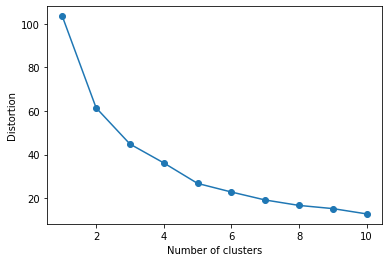

In [181]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

distortions = []
for i in range(1, 11):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=300,
        tol=1e-04, random_state=0
    )
    km.fit(final_num)
    distortions.append(km.inertia_) # 군집 내 분산, 적을수록 좋음

# plot - 급격하게 줄어드는 부분
plt.plot(range(1, 11), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [225]:
from sklearn.cluster import KMeans

model = KMeans(n_clusters = 2, random_state = 10)

# 정규화된 데이터에 학습
model.fit(final_num)

# 클러스터링 결과 각 데이터가 몇 번째 그룹에 속하는지 저장
final_num['cluster'] = model.fit_predict(final_num)
final_num
cluster2 = pd.concat([cat_dat, final_num], axis=1)
cluster2

C:\Users\kki96\AppData\Local\Temp/ipykernel_18780/3344183328.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_num['cluster'] = model.fit_predict(final_num)


,Full_NM,EMD_NM,SGG_NM,화재예방지수,용수시설지수,총인구수 (명),cluster
0,홍천군 홍천읍,홍천읍,홍천군,2.756807,1.472174,0.695115,1
1,횡성군 횡성읍,횡성읍,횡성군,2.533444,0.619892,0.426308,1
2,영월군 영월읍,영월읍,영월군,2.635925,1.485158,0.424352,1
3,원주시 지정면,지정면,원주시,1.893812,1.713634,0.597526,0
4,태백시 황지동,황지동,태백시,2.642765,0.479700,0.110632,1
...,...,...,...,...,...,...,...
189,철원군 근남면,근남면,철원군,1.196355,1.172767,0.030356,0
190,홍천군 내촌면,내촌면,홍천군,1.154208,1.158339,0.035783,0
191,강릉시 성내동,성내동,강릉시,2.661972,1.396627,0.149424,1
192,삼척시 노곡면,노곡면,삼척시,1.253535,1.309182,0.000000,0


In [205]:
k = 2

import matplotlib.pyplot as plt
plt.rc('font', family='NanumGothic')

plt.figure(figsize = (8, 8))

for i in range(k):
    plt.scatter(final_num.loc[final_num['cluster'] == i, '화재예방지수'], final_num.loc[final_num['cluster'] == i, '용수시설지수'], 
                label = 'cluster ' + str(i))

plt.legend()
plt.title('K = %d results'%k , size = 15)
plt.xlabel('화재예방지수', size = 12)
plt.ylabel('용수시설지수', size = 12)
plt.show()

In [209]:
k_means_labels = model.labels_ 
print('k_means_labels : ', k_means_labels)
k_means_cluster_centers = model.cluster_centers_ 
print('k_means_cluster_centers : ', k_means_cluster_centers)



k_means_labels :  [1 1 1 0 1 1 1 1 1 0 0 1 1 0 1 1 1 1 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1 1 1 0
 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1
 0 1 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 1
 0 1 0 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1
 1 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 0 0 1 0 0 1 0
 0 1 0 0 0 0 1 0 0]
k_means_cluster_centers :  [[1.68872632 1.32320529 0.09133139 0.01149425]
 [2.43521334 1.13064525 0.16141116 1.        ]]


In [214]:
import seaborn as sns

In [220]:
model.cluster_centers_[:, 3]

array([0.01149425, 1.        ])

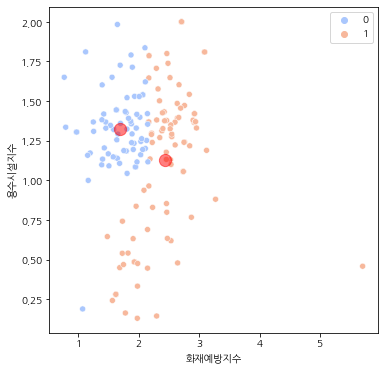

In [221]:
plt.figure(figsize=(20, 6))
plt.subplot(131)
sns.scatterplot(x = final_num['화재예방지수'], y = final_num['용수시설지수'], data=final_num, hue=model.labels_,palette='coolwarm')
plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], c='red', alpha=0.5, s=150)

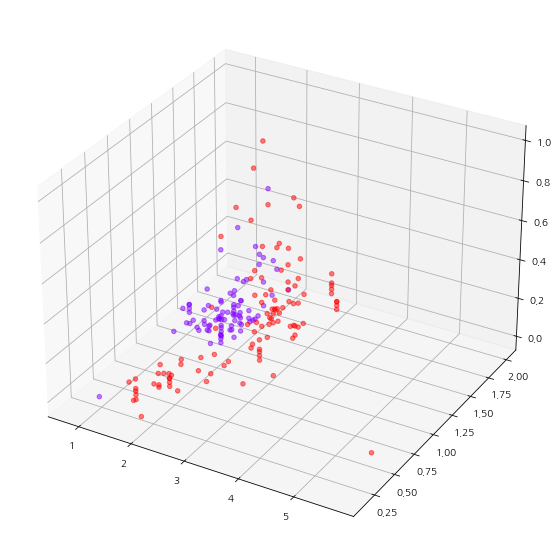

In [218]:
# https://frhyme.github.io/python-lib/matplotlib_3dplotting/
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d') 

x = final_num['화재예방지수']
y = final_num['용수시설지수']
z = final_num['총인구수 (명)']
ax.scatter(x, y, z, c = model.labels_, s= 20, alpha=0.5, cmap='rainbow')